In [1]:
'''
CAMERA CALIBRATION CODE

Created by: Udacity(c)
Modified by: Maryam Hanna 
Date: November 20, 2018
Email: maryamhanna@hotmail.com

MIT License, Permission is granted by Udacity(c) to obtain copy of this software. 
License could be found at LICENSE file. 

This is camera calbration code specific for Nikon 1 J1 camera. The resolution of 
time images used is 1280x720. The chessboard used is 9x7.
'''

'\nCAMERA CALIBRATION CODE\n\nCreated by: Udacity(c)\nModified by: Maryam Hanna \nDate: November 20, 2018\nEmail: maryamhanna@hotmail.com\n\nMIT License, Permission is granted by Udacity(c) to obtain copy of this software. \nLicense could be found at LICENSE file. \n\nThis is camera calbration code specific for Nikon 1 J1 camera. The resolution of \ntime images used is 1280x720. The chessboard used is 9x7.\n'

In [2]:
# importing required libraries 
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import pickle 
%matplotlib qt
%matplotlib inline

In [3]:
# initializing varibales 
objp = np.zeros((7*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9, 0:7].T.reshape(-1,2)
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

In [4]:
# list of calibration images
mypath = ("C:/Users/wicip/Documents/maryam_final/Images/Camera_Calibration/calib/")
dirs = os.listdir(mypath)

In [5]:
# for every image searches for chessboard corners
for filename in (dirs):
    filename_str = str(filename)
    file_true = filename_str.find('camera')
    if not file_true:
        img = cv2.imread(os.path.join(mypath, filename)) 
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)#reading images as grayscale
        # chessboard corners
        ret, corners = cv2.findChessboardCorners(gray, (9,7), None)
        # if corners are found, add object points and image points
        if ret == True:
            objpoints.append(objp)
            imgpoints.append(corners)
            # drawing and displaying corners
            cv2.drawChessboardCorners(img, (9,7), corners, ret)
            write_name = mypath + 'corners_found_'+ filename +'.jpg'
            cv2.imwrite(write_name, img)

In [6]:
# test undistortion on an image
test_img = cv2.imread(os.path.join(mypath,'test_image.JPG'))
test_img_size = (test_img.shape[1], test_img.shape[0])

# do camera calibration given object points and image points
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, test_img_size, None, None)
dst = cv2.undistort(img, mtx, dist, None, mtx)

# save undistorted image
write_name = mypath + 'test_undist.jpg'
cv2.imwrite(write_name ,dst)

True

Text(0.5, 1.0, 'Undistorted Image')

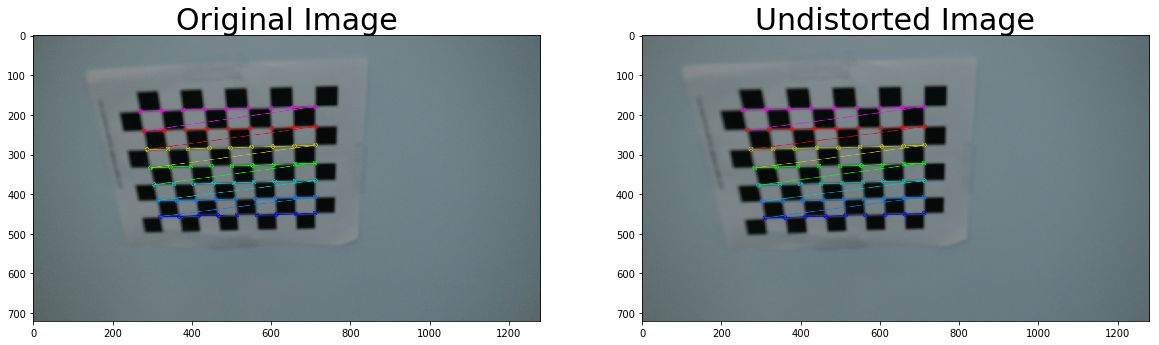

In [7]:
# Visualize undistortion
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=30)

In [8]:
# save the camera calibration result for later use 
dist_pickle = {}
dist_pickle["mtx"] = mtx
dist_pickle["dist"] = dist
pickle_out = open( "dist_pickle.p", "wb" )
pickle.dump(dist_pickle, pickle_out)
pickle_out.close()